In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, auc, confusion_matrix, classification_report

# Models
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [13]:
# Loading ROS-resampled dataset
df = pd.read_csv("../data/resampled_datas/resampled_ros.csv")
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [14]:
# Spliting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Defining models to evaluate
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB()
}

results = []


MODEL: Decision Tree
Accuracy: 0.8754
ROC-AUC: 0.8766
PR-AUC: 0.9025

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.80      0.86      1021
         1.0       0.83      0.95      0.89      1049

    accuracy                           0.88      2070
   macro avg       0.88      0.87      0.87      2070
weighted avg       0.88      0.88      0.87      2070



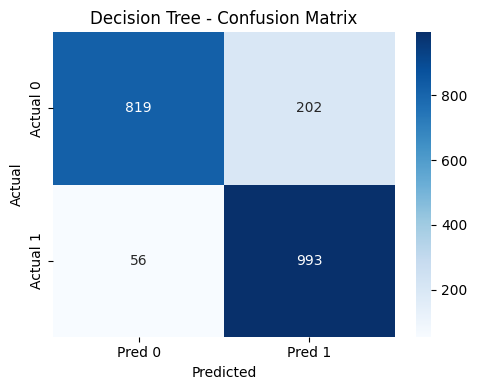


MODEL: XGBoost
Accuracy: 0.8531
ROC-AUC: 0.9266
PR-AUC: 0.9128

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84      1021
         1.0       0.82      0.91      0.86      1049

    accuracy                           0.85      2070
   macro avg       0.86      0.85      0.85      2070
weighted avg       0.86      0.85      0.85      2070



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:46:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


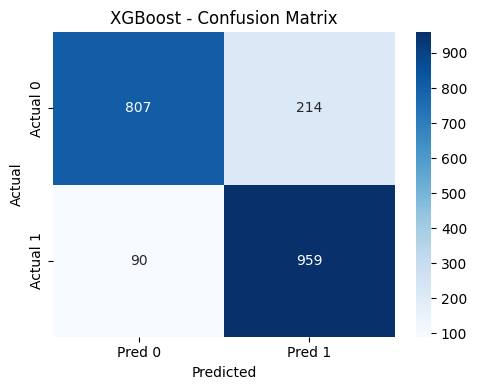


MODEL: KNN
Accuracy: 0.7734
ROC-AUC: 0.8435
PR-AUC: 0.8370

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.71      0.75      1021
         1.0       0.75      0.84      0.79      1049

    accuracy                           0.77      2070
   macro avg       0.78      0.77      0.77      2070
weighted avg       0.78      0.77      0.77      2070



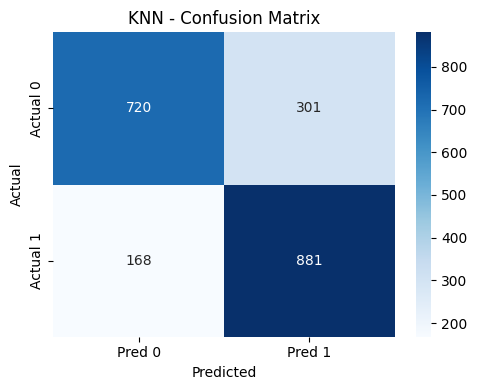


MODEL: Random Forest
Accuracy: 0.9010
ROC-AUC: 0.9680
PR-AUC: 0.9664

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.85      0.89      1021
         1.0       0.86      0.95      0.91      1049

    accuracy                           0.90      2070
   macro avg       0.91      0.90      0.90      2070
weighted avg       0.91      0.90      0.90      2070



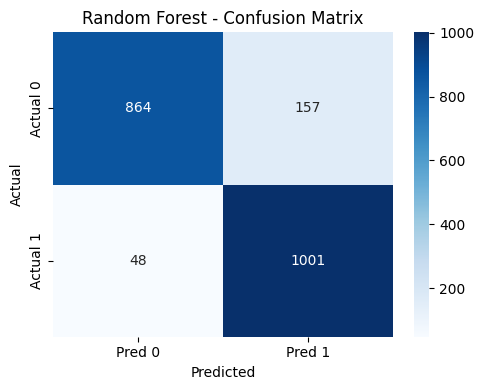


MODEL: Logistic Regression
Accuracy: 0.7850
ROC-AUC: 0.8605
PR-AUC: 0.8380

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.74      0.77      1021
         1.0       0.77      0.83      0.80      1049

    accuracy                           0.79      2070
   macro avg       0.79      0.78      0.78      2070
weighted avg       0.79      0.79      0.78      2070



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


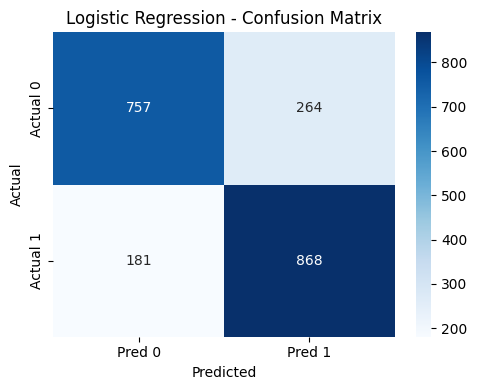


MODEL: SVM
Accuracy: 0.6560
ROC-AUC: 0.7428
PR-AUC: 0.7588

Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.71      0.67      1021
         1.0       0.68      0.60      0.64      1049

    accuracy                           0.66      2070
   macro avg       0.66      0.66      0.66      2070
weighted avg       0.66      0.66      0.66      2070



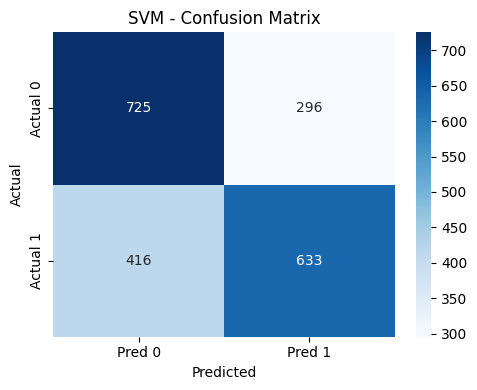


MODEL: Naive Bayes
Accuracy: 0.7551
ROC-AUC: 0.8329
PR-AUC: 0.8134

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.63      0.72      1021
         1.0       0.71      0.87      0.78      1049

    accuracy                           0.76      2070
   macro avg       0.77      0.75      0.75      2070
weighted avg       0.77      0.76      0.75      2070



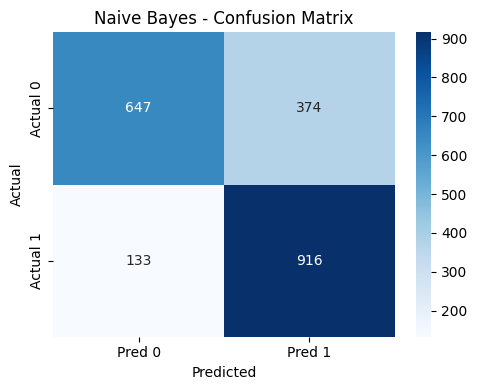

In [16]:
# Training and evaluating each model
for name, model in models.items():
    print(f"\nMODEL: {name}") 
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculating performance metrics
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred_proba)
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)

    print(f"Accuracy: {acc:.4f}")
    print(f"ROC-AUC: {roc:.4f}")
    print(f"PR-AUC: {pr_auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Storing results
    results.append({
        "Model": name,
        "Accuracy": acc,
        "ROC-AUC": roc,
        "PR-AUC": pr_auc
    })

    # Ploting confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()


In [17]:
# Showing results as a DataFrame
df_results = pd.DataFrame(results)
print("\nModel Comparison (sorted by PR-AUC):")
print(df_results.sort_values(by="PR-AUC", ascending=False))


Model Comparison (sorted by PR-AUC):
                 Model  Accuracy   ROC-AUC    PR-AUC
3        Random Forest  0.900966  0.967953  0.966412
1              XGBoost  0.853140  0.926650  0.912758
0        Decision Tree  0.875362  0.876613  0.902485
4  Logistic Regression  0.785024  0.860541  0.837971
2                  KNN  0.773430  0.843486  0.837004
6          Naive Bayes  0.755072  0.832892  0.813442
5                  SVM  0.656039  0.742831  0.758754


In [18]:
df_results["Resampling"] = "ROS"

# Save to CSV
df_results.to_csv(f"../data/results/results_ros.csv", index=False)

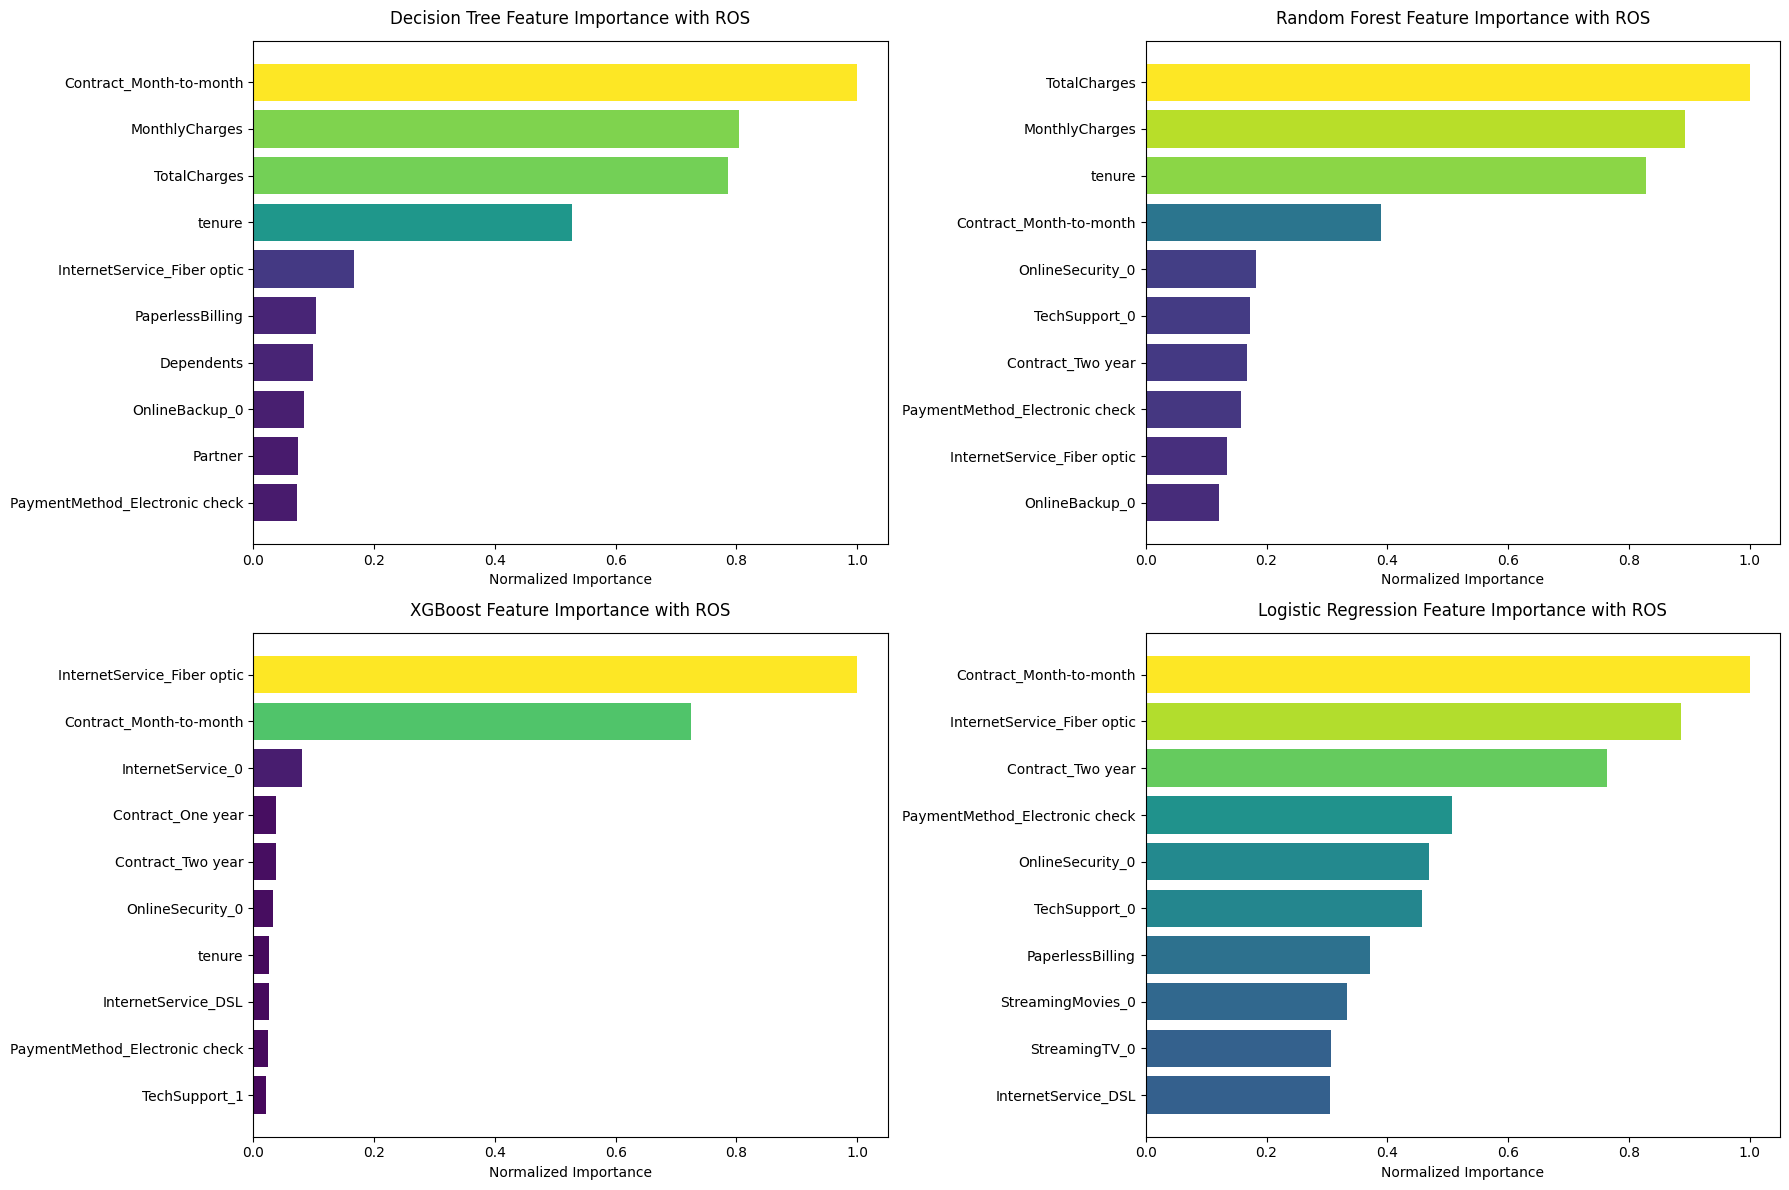

In [24]:
# Feature Importance 
import numpy as np
from sklearn.inspection import permutation_importance
from matplotlib import cm
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 12))
supported_models = {
    "Decision Tree": models["Decision Tree"],
    "Random Forest": models["Random Forest"],
    "XGBoost": models["XGBoost"],
    "Logistic Regression": models["Logistic Regression"]
}

for i, (name, model) in enumerate(supported_models.items(), 1):
    plt.subplot(2, 2, i)
    
    try:
        if name in ["Decision Tree", "Random Forest", "XGBoost"]:
            importances = model.feature_importances_
        elif name == "Logistic Regression":
            importances = np.abs(model.coef_[0])
        
        # normalization
        importances = (importances - importances.min()) / (importances.max() - importances.min() + 1e-10)
        feature_names = X.columns
        
        # Top 10 feature
        top_idx = np.argsort(importances)[-10:]
        plt.barh(range(len(top_idx)), importances[top_idx], align='center', color=cm.viridis(importances[top_idx]))
        plt.yticks(range(len(top_idx)), [feature_names[i] for i in top_idx])
        plt.title(f'{name} Feature Importance with ROS', pad=12, fontsize=12)
        plt.xlabel('Normalized Importance', fontsize=10)
        
    except Exception as e:
        print(f"{name} için importance hesaplanamadı: {str(e)}")
        continue

plt.tight_layout()
plt.show()

In [20]:
#KNN for feature importance

from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Feature Calculation with Permutation
result = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=42)

# Results as data frame
import pandas as pd

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

print(importance_df.head(10))


                                    Feature  Importance
6                              TotalCharges    0.185700
5                            MonthlyCharges    0.169469
3                                    tenure    0.053430
11                         OnlineSecurity_1    0.002126
10                         OnlineSecurity_0    0.002029
2                                Dependents    0.001691
4                          PaperlessBilling    0.001401
1                                   Partner    0.001256
27  PaymentMethod_Bank transfer (automatic)    0.001256
28    PaymentMethod_Credit card (automatic)    0.000870


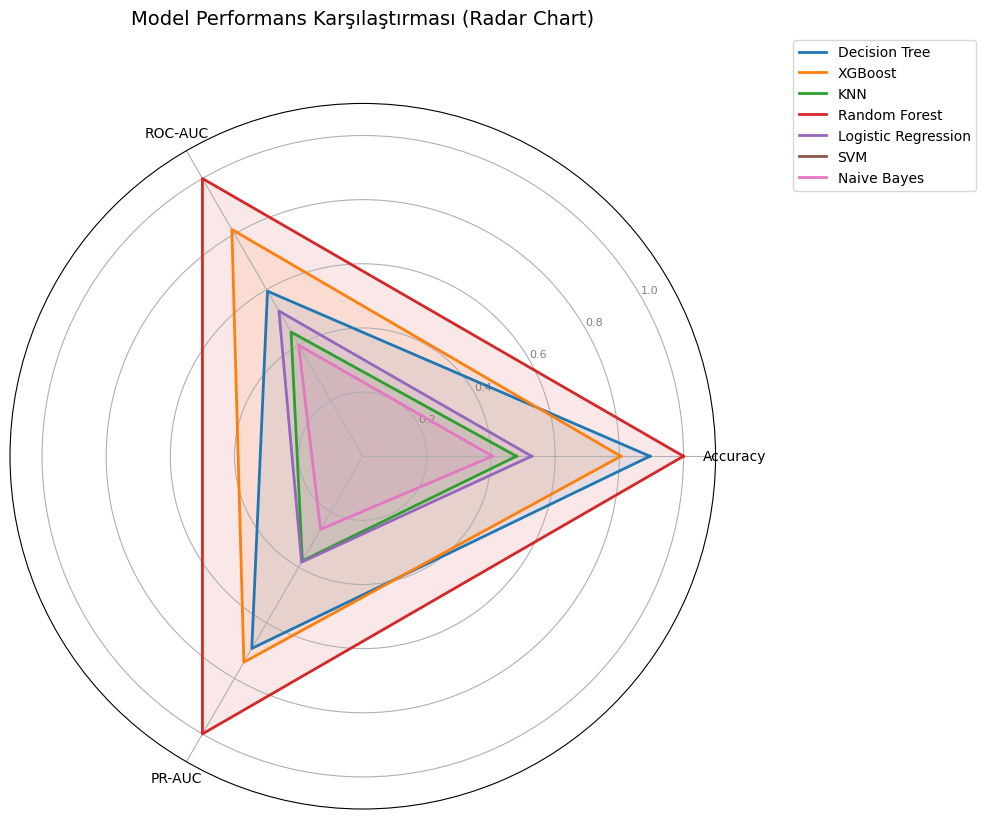

In [21]:
from math import pi

# Radar chart için veri hazırlama
categories = ['Accuracy','ROC-AUC','PR-AUC']
df_radar = df_results.set_index('Model')[categories]

# Normalizasyon
df_radar = (df_radar - df_radar.min()) / (df_radar.max() - df_radar.min())

# Radar chart çizimi
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Eksen ayarları
plt.xticks(angles := [i*2*pi/len(categories) for i in range(len(categories))], categories)
ax.set_rlabel_position(30)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], color="grey", size=8)
plt.ylim(0, 1.1)

# Her model için çizim
colors = plt.cm.tab10.colors
for idx, (model, row) in enumerate(df_radar.iterrows()):
    values = row.values.flatten().tolist()
    values += values[:1]  # Kapalı şekil için
    ax.plot(angles + angles[:1], values, color=colors[idx], linewidth=2, linestyle='solid', label=model)
    ax.fill(angles + angles[:1], values, color=colors[idx], alpha=0.1)

plt.title('Model Performans Karşılaştırması (Radar Chart)', y=1.1, fontsize=14)
plt.legend(bbox_to_anchor=(1.1, 1.1), loc='upper left')
plt.tight_layout()
plt.show()

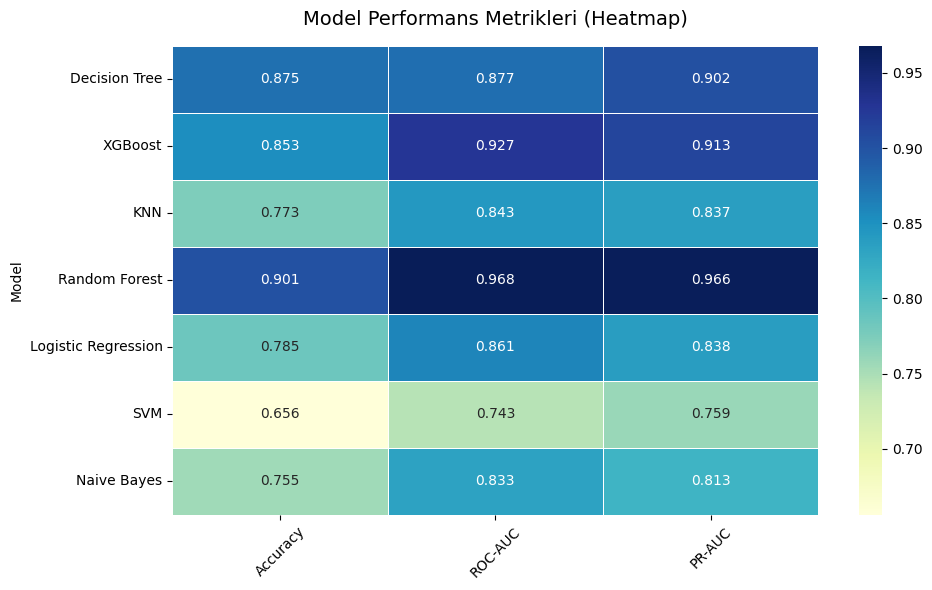

In [22]:
# Heatmap için veriyi hazırla
df_heat = df_results.set_index('Model')[['Accuracy', 'ROC-AUC', 'PR-AUC']]

plt.figure(figsize=(10, 6))
sns.heatmap(df_heat, annot=True, fmt=".3f", cmap="YlGnBu", linewidths=.5)
plt.title('Model Performans Metrikleri (Heatmap)', pad=15, fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()